# Import

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

In [109]:
df = pd.read_csv('concrete_data.csv')

In [110]:
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100,33.56
424,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,14,33.01
28,427.5,47.5,0.0,228.0,0.0,932.0,594.0,28,37.43
210,230.0,0.0,118.3,195.5,4.6,1029.4,758.6,14,20.08
560,220.8,147.2,0.0,185.7,0.0,1055.0,744.3,28,25.75


In [111]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [112]:
df.shape

(1030, 9)

In [113]:
X = df.drop(columns=['Strength'])
Y = df['Strength']

In [114]:
Y.sample(5)

130    74.70
610    25.08
571    39.70
420    33.09
995    27.68
Name: Strength, dtype: float64

In [115]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [116]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [117]:
lr = LinearRegression()

In [118]:
lr.fit(x_train,y_train)

LinearRegression()

In [119]:
y_pred = lr.predict(x_test)

In [120]:
from sklearn.metrics import  r2_score

r2 = r2_score(y_test, y_pred)

print("R2 Score is: ", r2)

R2 Score is:  0.6275531792314848


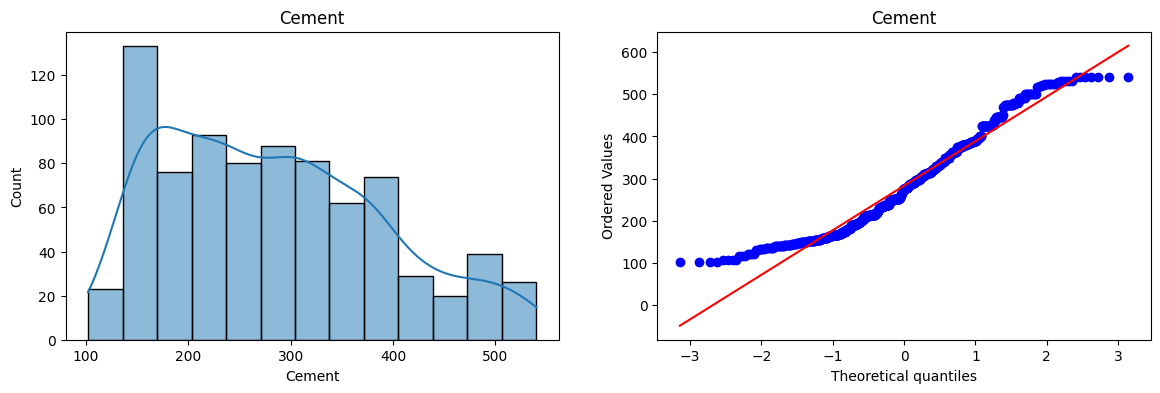

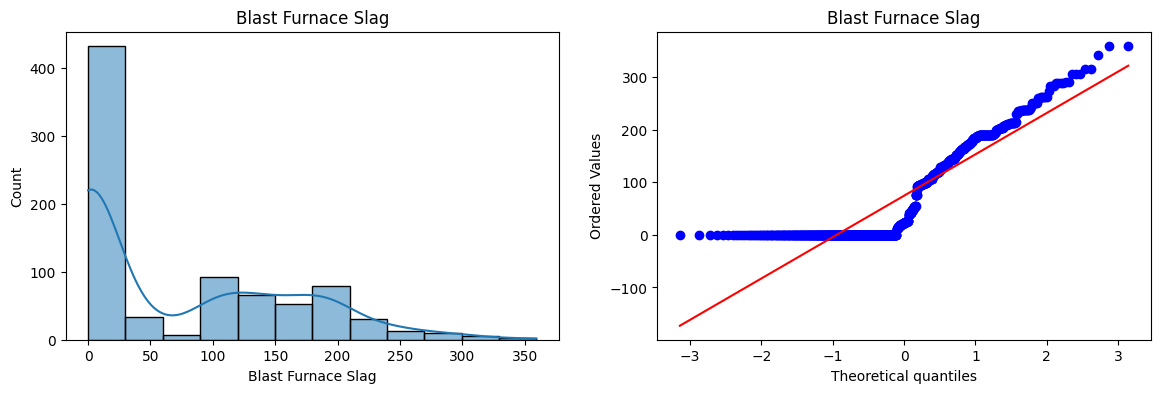

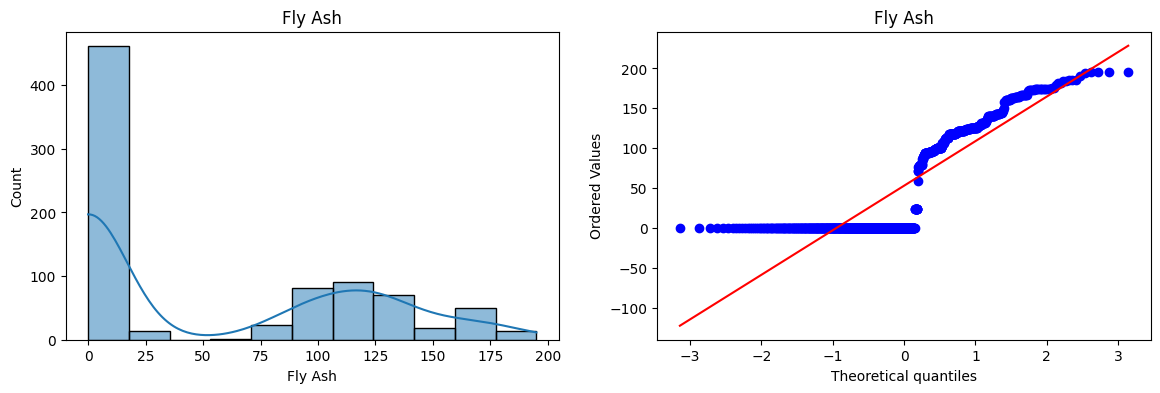

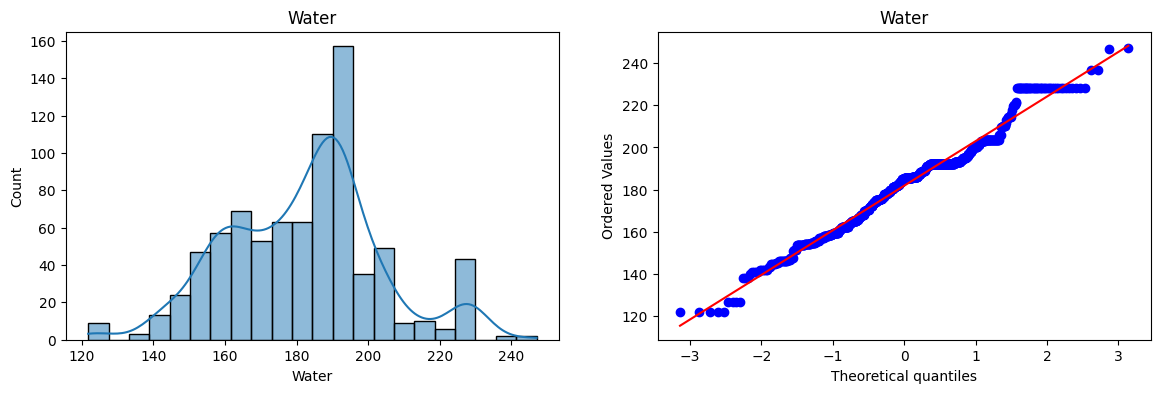

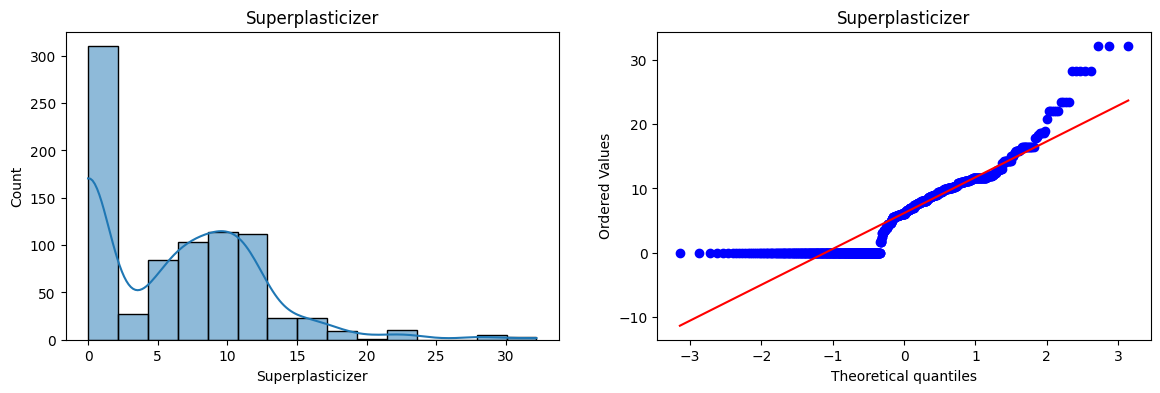

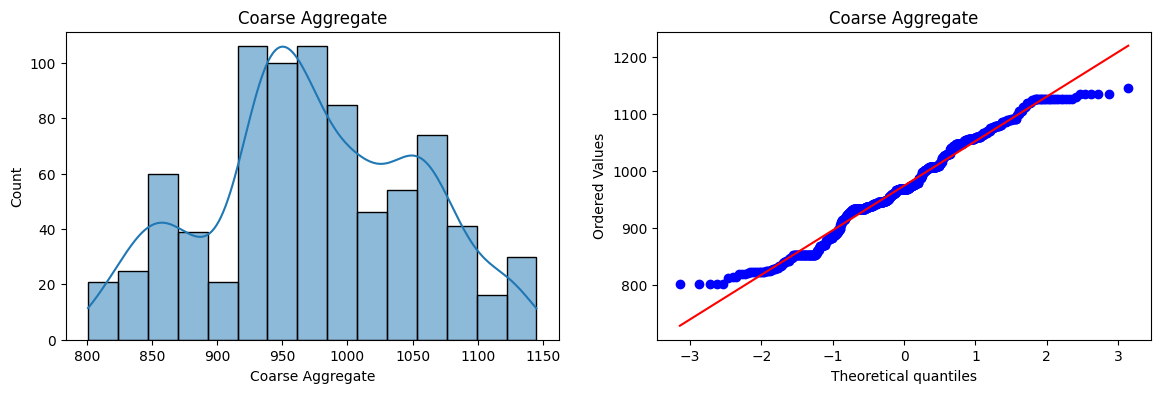

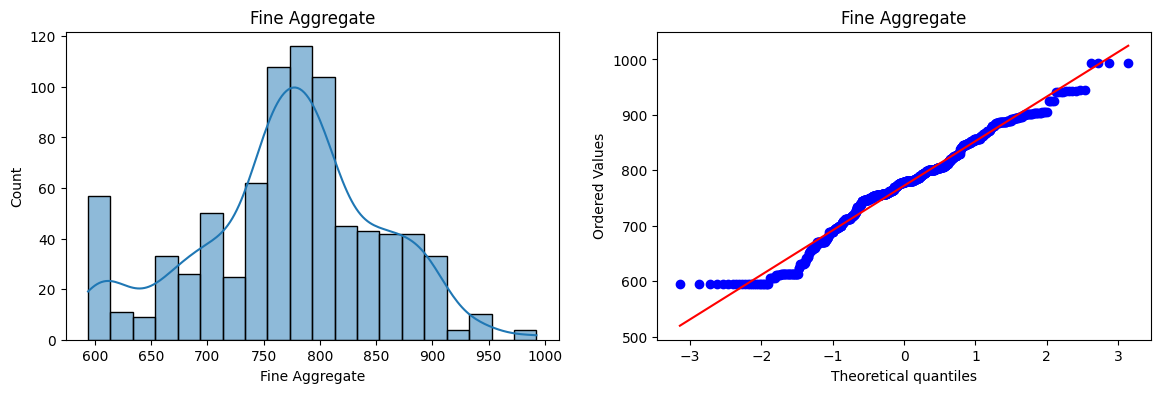

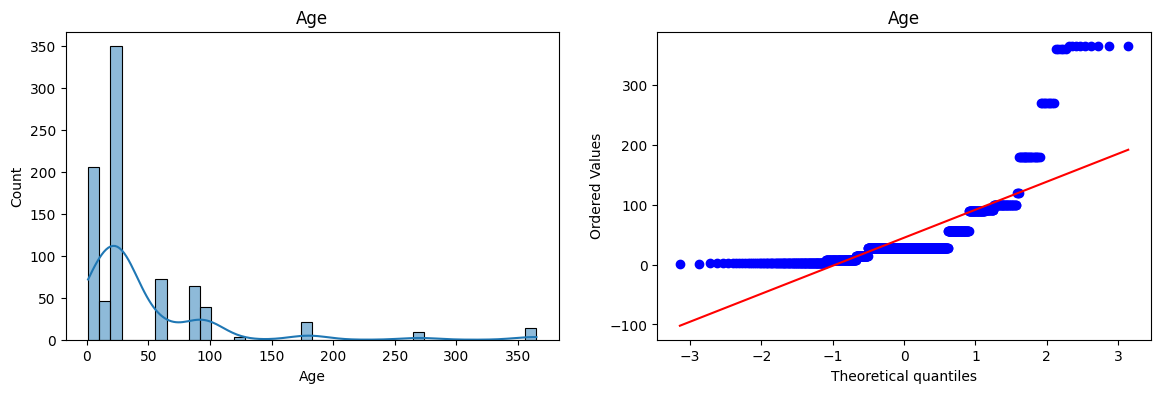

In [121]:
for col in x_train:

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col],kde=True)
    plt.title(col)


    plt.subplot(122)
    stats.probplot(x_train[col],plot=plt,dist="norm")
    plt.title(col)

    plt.show()


# Applying  Box-Cox

In [122]:
pt = PowerTransformer(method='box-cox')

x_train_transformed = pt.fit_transform(x_train+0.00001)
x_test_transformed = pt.transform(x_test+0.00001)



pd.DataFrame({'cols':x_train.columns,'lamdas':pt.lambdas_})

,cols,lamdas
0,Cement,0.177025
1,Blast Furnace Slag,0.027842
2,Fly Ash,-0.044554
3,Water,0.772681
4,Superplasticizer,0.113892
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066630


In [123]:
lr = LinearRegression()

In [124]:
lr.fit(x_train_transformed,y_train)

y_pred = lr.predict(x_test_transformed)

In [125]:
print("Accuracy :",r2_score(y_test,y_pred))

Accuracy : 0.8054599366943797


In [126]:
x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)

In [127]:
x_train_transformed

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,0.960702,1.128203,-0.301920,0.919073,-0.262500,-0.677568,0.106010
1,1.244706,0.672998,1.139074,-0.165055,0.745745,-1.912728,-0.314062,0.106010
2,0.079842,-1.084755,1.132038,-1.047291,0.791178,1.018407,0.025957,-1.675970
3,-0.145641,0.894884,1.092185,0.581224,0.727899,-1.750779,0.583253,0.106010
4,-1.131044,0.769285,1.134025,-1.105297,0.817461,1.368575,0.262623,-1.675970
...,...,...,...,...,...,...,...,...
819,0.183601,1.007172,-0.887164,-1.769923,0.828524,0.390563,0.358776,-1.675970
820,-0.198733,-1.084755,1.134565,-1.839129,0.849638,1.445973,0.322797,-0.475625
821,-0.844517,-1.084755,1.134632,-0.706089,0.791178,1.345367,0.297157,1.246733
822,1.565624,0.925921,-0.887164,-0.019311,0.759365,-1.537255,0.076211,0.106010


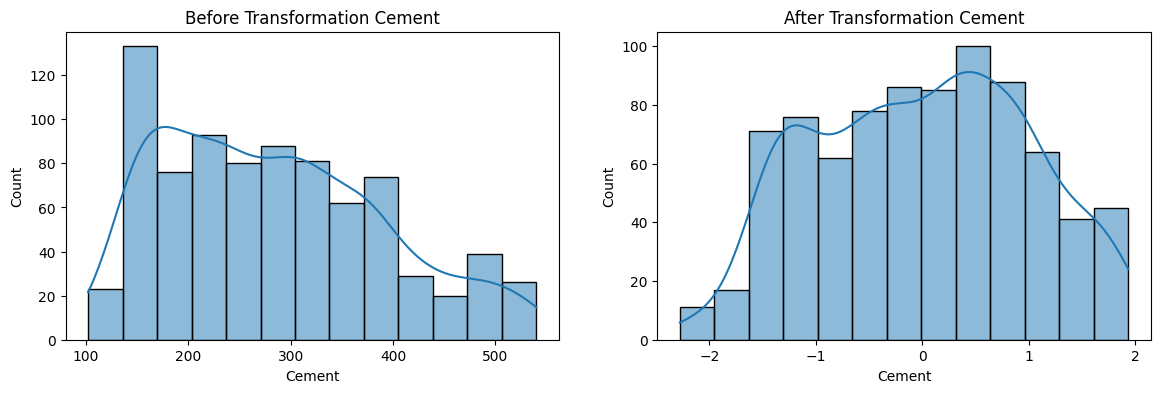

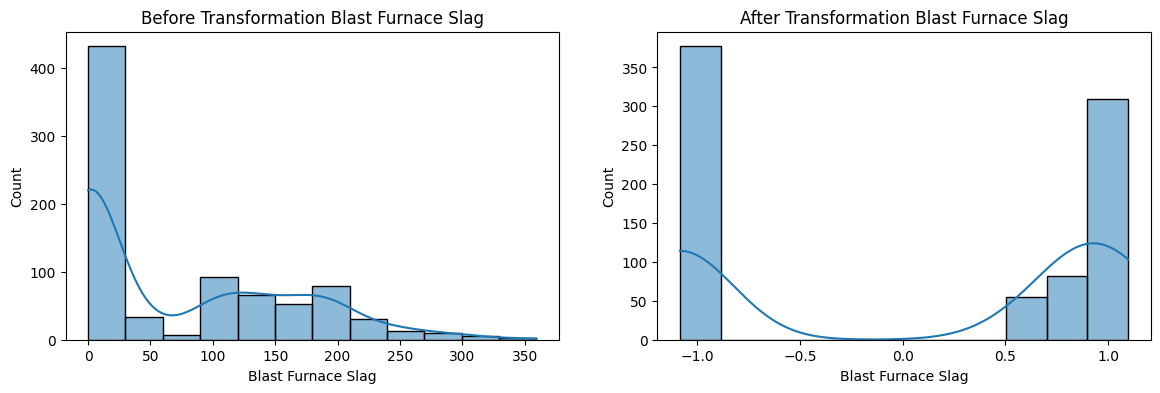

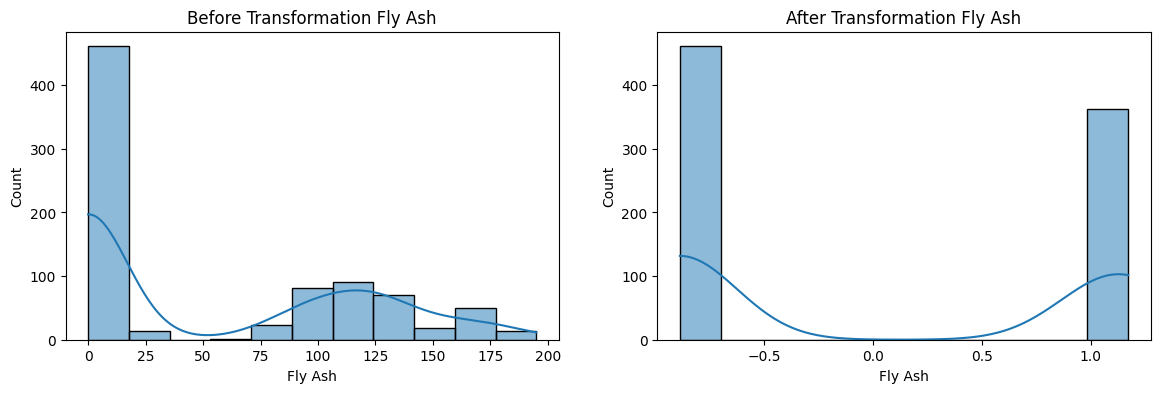

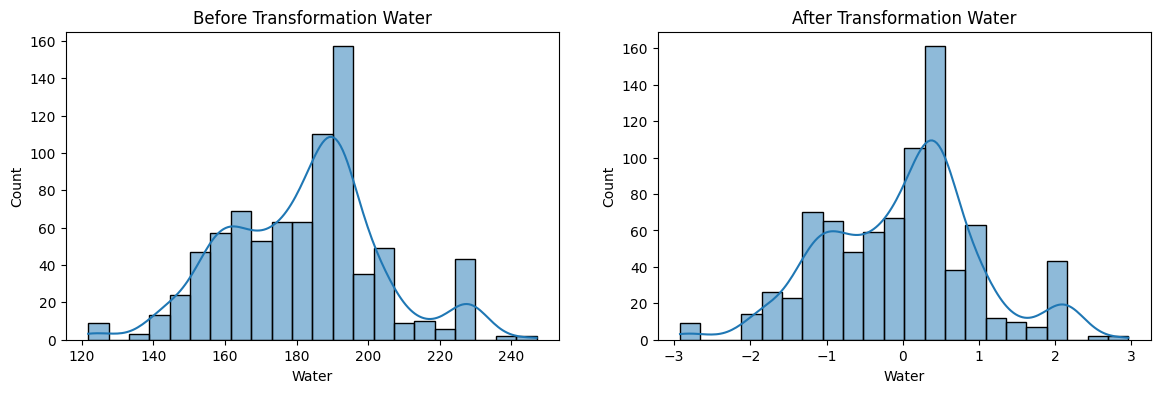

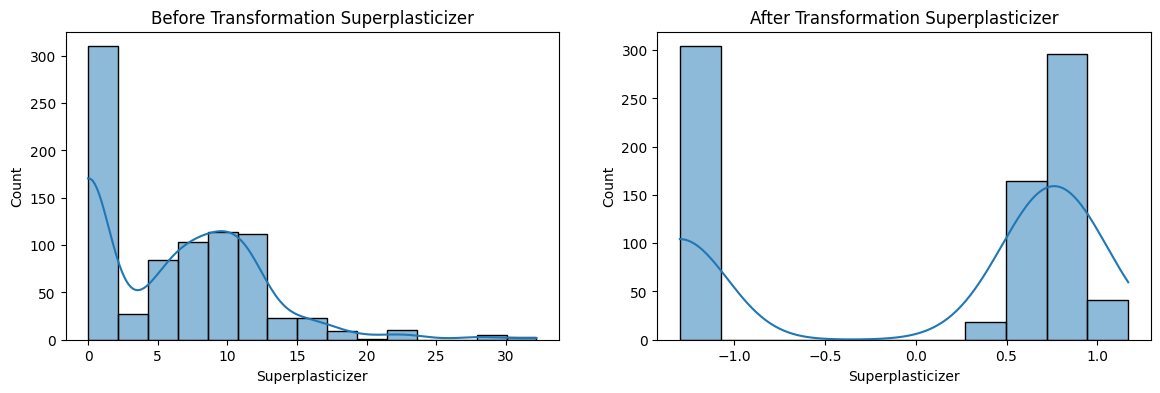

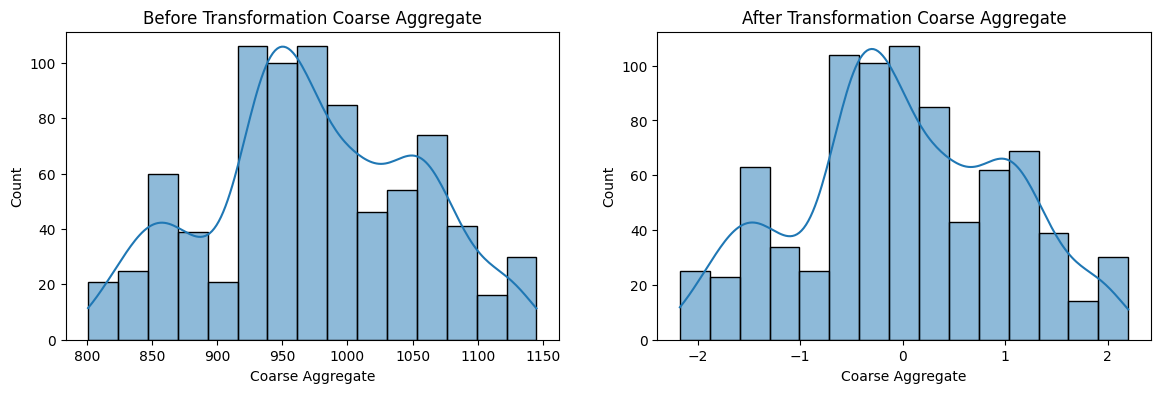

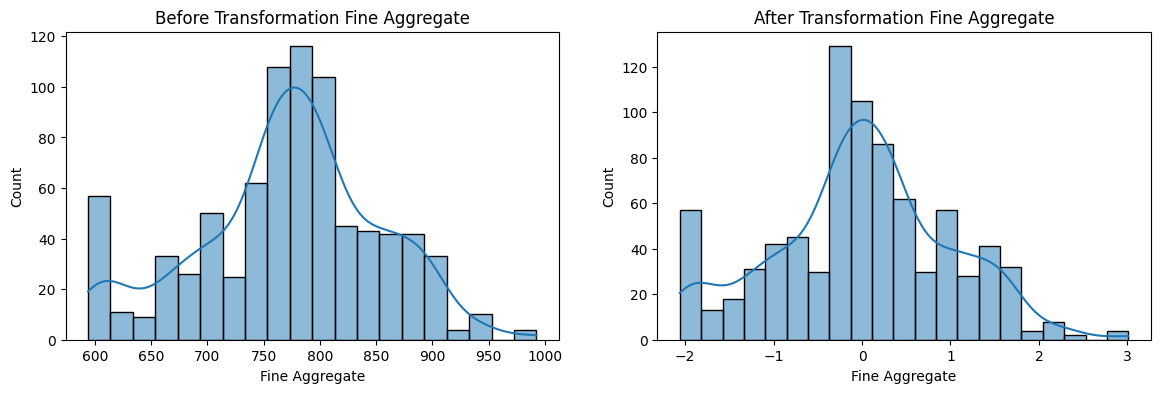

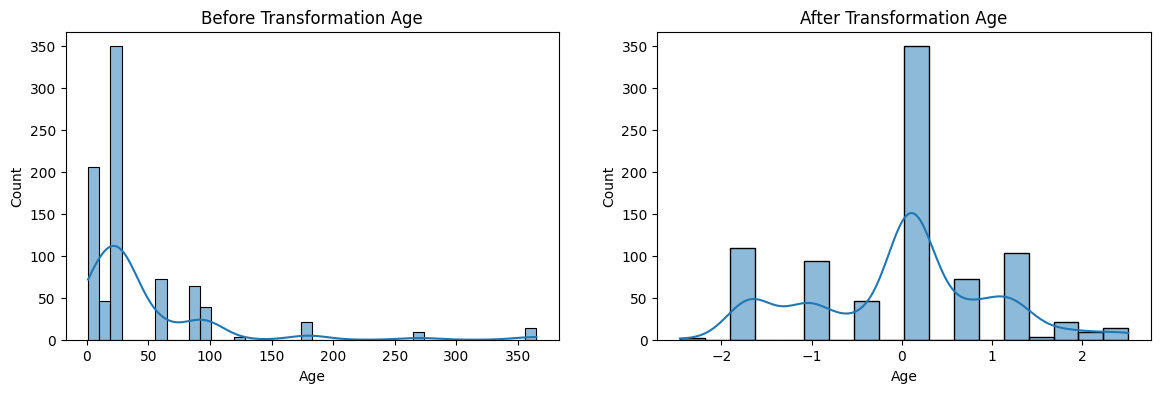

In [137]:
for cols in x_train_transformed:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[cols],kde=True)
    plt.title(f"Before Transformation {cols}")


    plt.subplot(122)
    sns.histplot(x_train_transformed[cols],kde=True)
    plt.title(f"After Transformation {cols}")
